# Logistic Regression on Small Digits Dataset

### Loading the Data

The small digits dataset is available in sklearn.

<ins>Note:</ins>
sklearn.datasets är exempel på data för att man ska lära sig sklearn algoritmer

In [62]:
%matplotlib inline
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

Lets check the format of the data

In [63]:
# There are 1797 images (8 by 8 images, stored in vectors)
print("Image Data Shape" , digits.data.shape)
# 1797 labels (0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### Show typical Images and Labels

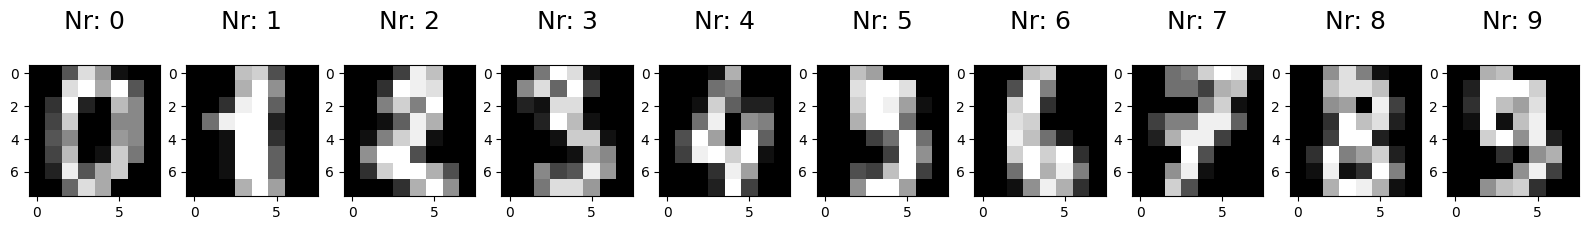

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1,10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Nr: %i\n' % label, fontsize = 18)

### Split Data into Training and Test **Sets**

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

### Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

**Step 1.** Import the logistic regression method
Initiate an instance with some parameters

<ins>Note:</ins>
<strong>C:</strong> Regulariserings styrka
<strong>tol:</strong> Tolerans på stopping kriteriet

In [66]:
from sklearn.linear_model import LogisticRegression
# Experiment with other parameters until you get something that works fine
logitmodel = LogisticRegression(max_iter=10,tol=1,C=0.001)

**Step 2.** Train the model on the data

In [67]:
logitmodel.fit(x_train, y_train)

LogisticRegression(C=0.001, max_iter=10, tol=1)

In [68]:
# Calculate accuracy (Enew)
score = logitmodel.score(x_test, y_test)
print('{0:.4f}'.format(score))

0.8600


**Step 3.** Predict the labels of new images

In [69]:
# Make Predictions on Test Data and compare with truth
predictions = logitmodel.predict(x_test)
print(predictions[120:150])
print(y_test[120:150])

[2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9 0 6]
[2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9 0 3]


### Confusion Matrix (Digits Dataset)

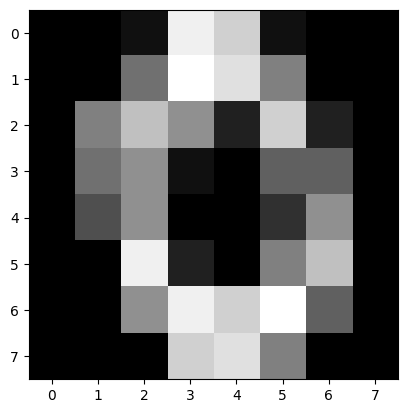

In [70]:
plt.imshow(np.reshape(x_test[140,:], (8,8)), cmap=plt.cm.gray)

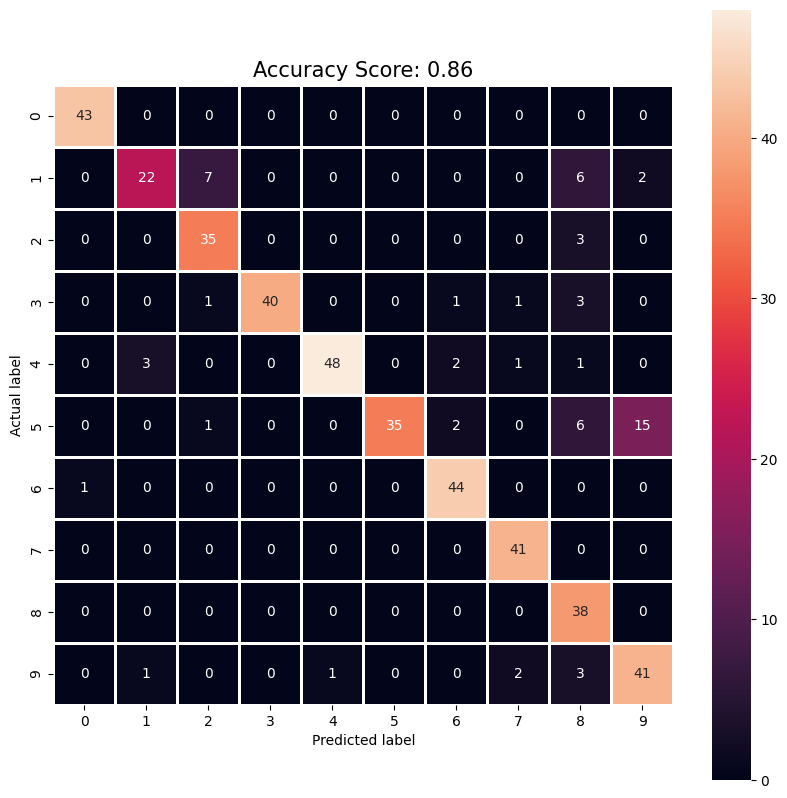

In [71]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);
#plt.savefig('smalldigits.png')
#plt.show();

[5, 11, 32, 50, 69, 71, 72, 73, 78, 94, 99, 100, 102, 105, 107, 116, 149, 156, 159, 164, 166, 169, 193, 200, 214, 222, 233, 234, 235, 241, 244, 248, 249, 269, 270, 276, 281, 286, 293, 306, 310, 318, 319, 321, 339, 348, 352, 359, 372, 374, 377, 387, 396, 399, 401, 418, 421, 425, 426, 431, 438, 441, 445]


Text(0.5, 1.0, '9')

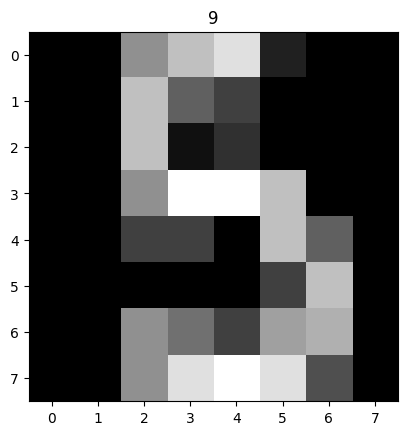

In [75]:
# Find the image corresponding to a mis-classified digit:
# insert code here

rows = np.arange(0,len(cm[0]),1).tolist()
columns = np.arange(0,len(cm),1).tolist()

wrong_digits = []
sum_missclassified_digits = 0
for row in rows:
    for column in columns:
        if row == column:
            pass
        else:
            if not cm[row][column] == 0:
                wrong_digits.append((row, column))
                sum_missclassified_digits += cm[row][column]

indexes = np.arange(0,len(predictions),1)
wrong_labelled_images = []
for index in indexes:
    if y_test[index] != predictions[index]:
        wrong_labelled_images.append(index)

#print(len(wrong_labelled_images), sum_missclassified_digits) 54 miss-classified digits
print(wrong_labelled_images)
index = 71 #pick an index of the image you wish to show from wrong_labelled_images

plt.imshow(np.reshape(x_test[index,:], (8,8)), cmap=plt.cm.gray)
plt.title(predictions[index])

In [81]:
# Calculate variance in accuracy
import math

sum = 0
indexes = np.arange(0,len(y_test),1)
for idx in indexes:
    if y_test[idx] == predictions[idx]:
        sum += 1
acc = sum/len(y_test)

variance = len(predictions)*acc*(1-acc)

print(variance, math.sqrt(variance))


54.18000000000001 7.3607064878311785
